# Importo librerias y df

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import plotly.graph_objs as go
import plotly.express as px
from plotly.subplots import make_subplots
import seaborn as sns
# !pip install statsmodels
from PIL import Image
import plotly.io as pio
from matplotlib.colors import ListedColormap

In [2]:
%matplotlib inline

In [3]:
# Becas por mes
becas_por_mes_v = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\PICKLES\becas_por_mes_v.pkl')
# Becas
becas = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\PICKLES\becas.pkl')

becados_voley = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\PICKLES\becados_voley.pkl')
costo_total_becas = pd.read_pickle(r"C:\Users\emita\Bootcamp\EDA\PICKLES\costo_total_becas.pkl")

In [4]:
# Voley
egresos_v = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\PICKLES\egresos_v.pkl')
ingresos_voley = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\PICKLES\ingresos_v.pkl')

In [5]:
ingresos_egresos_v = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\PICKLES\ingresos_egresos_v.pkl')

In [6]:
# Pago de cuotas por categoria
pagos_voley_limpio = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\PICKLES\pagos_voley_limpio.pkl')

# Resultados de ingresos, egresos, permanencias, totales de alumnos y porcentajes
resultados_v = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\PICKLES\resultados_v.pkl')

In [8]:
# Listado de socios
socios_2024 = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\PICKLES\socios_2024.pkl')

# DF de socios por mes
socios_por_mes_tot = pd.read_pickle(r'C:\Users\emita\Bootcamp\EDA\PICKLES\socios_por_mes_tot.pkl') 

# Divido el df socios_por_mes_tot en dos para que sea mas manejable 
socios_vol_por_mes = socios_por_mes_tot.drop(columns='SOCIOS_HAND')

In [9]:
ingresos_voley['CATEGORIA'] = ingresos_voley['CATEGORIA'].replace('Su14', 'Sub14')
ingresos_voley['CATEGORIA'].unique()

# pago_cuotas_categorias = ['Mini', 'Primera', 'Sub12', 'Sub14', 'Sub16', 'Sub18', 'Sub19', 'Recreativo']

# mask = ingresos_voley.loc[:, 'CATEGORIA'].isin(pago_cuotas_categorias)

# ingresos_voley = ingresos_voley[mask]
# ingresos_voley

array(['Sub16', 'Sub18', 'Sub14', 'Primera', 'Sub12', 'Mini', 'Sub19',
       'Recreativo', 'Devolucion'], dtype=object)

# 1. Análisis de la Sostenibilidad Financiera

Pantallazo de ingresos y egresos mensuales del anio

In [10]:
# Crear el DataFrame 'totales_por_mes' con las columnas correspondientes
x = ingresos_egresos_v

# Definir las trazas (traces) para los ingresos y egresos
trace1 = {
    'x': x['FECHA'],  # Usamos la columna 'FECHA' para el eje X
    'y': ingresos_egresos_v['INGRESOS'],
    'name': 'Ingresos',
    'type': 'bar',
    'marker': {'color': '#900C3F'}  # Color para los ingresos
}

trace2 = {
    'x': x['FECHA'],  # Usamos la columna 'FECHA' para el eje X
    'y': ingresos_egresos_v['EGRESOS'],
    'name': 'Egresos',
    'type': 'bar',
    'marker': {'color': '#FF5733'}  # Color para los egresos
}

# Lista de trazas
data = [trace1, trace2]

# Layout del gráfico
layout = {
    'xaxis': {
        'title': 'Fecha',  # Título para el eje X
        'tickangle': 45,  # Rotar las etiquetas del eje X para una mejor visualización
        'tickmode': 'array',  # Asegura que las fechas se muestren de manera ordenada
    },
    'yaxis': {
        'title': 'Monto Total',  # Título para el eje Y
        'tickprefix': '$',  # Añadir el símbolo de moneda
        'showgrid': True,  # Mostrar las líneas de la rejilla en el fondo
        'gridcolor': 'lightgrey'  # Color de las líneas de la rejilla
    },
    'barmode': 'group',  # Agrupar las barras para cada mes
    'title': 'Ingresos y Egresos Mensuales 2024',  # Título principal del gráfico
    'plot_bgcolor': 'white',  # Color de fondo del gráfico
    'paper_bgcolor': '#f4f4f4',  # Color de fondo exterior del gráfico
    'margin': {'l': 50, 'r': 50, 't': 50, 'b': 100},  # Ajuste de márgenes
    'hovermode': 'x unified',  # Mostrar la información en el hover de manera unificada
}

# Crear la figura
fig = go.Figure(data=data, layout=layout)

# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Ingresos_y_Egresos_v.html', auto_open=True)

- A diferencia de lo que sucede con handball, en Voley los inresos superan los egresos cada mes. A veces incluso con ampliasuperioridad, como por ejemplo el mes de julio. 
- En esta grafica, ademas de los ingresos y agresos he agregado el saldo: el resultante de egresos - ingresos acumulado mes a mes, y vemos que solo estamos en negativo en el mes de Febrero, el resto de los meses hemos superado ese umbral negativo, que ayuda a salvar los meses en que los egresos puedan superar los ingresos.

In [11]:
ingresos_egresos_v
# Crear la columna 'Saldo Acumulado' sumando los valores mes a mes en la columna 'SALDO'
ingresos_egresos_v['Acumulado'] = ingresos_egresos_v['SALDO'].cumsum()

In [12]:
# Crear la figura con las tres series de tiempo en el mismo gráfico
fig = go.Figure()

# Ingresos
fig.add_trace(go.Scatter(
    x=ingresos_egresos_v['FECHA'], 
    y=ingresos_egresos_v['INGRESOS'], 
    mode='lines+markers',
    line=dict(color='#900C3F', width=2), 
    marker=dict(size=8, color='#900C3F', symbol='circle'),
    name='Ingresos'
))

# Egresos
fig.add_trace(go.Scatter(
    x=ingresos_egresos_v['FECHA'], 
    y=ingresos_egresos_v['EGRESOS'], 
    mode='lines+markers',
    line=dict(color='#FF5733', width=2), 
    marker=dict(size=8, color='#FF5733', symbol='circle'),
    name='Egresos'
))

# Egresos
fig.add_trace(go.Scatter(
    x=ingresos_egresos_v['FECHA'], 
    y=ingresos_egresos_v['Acumulado'], 
    mode='lines+markers',
    line=dict(color='#FFC300', width=2), 
    marker=dict(size=8, color='#FFC300', symbol='circle'),
    name='Saldo'
))

# Línea punteada en Y = 0 (ahora usando el rango extendido del eje X)
fig.add_shape(
    type="line",
    x0="FEB", x1="OCT",  # Ajustar manualmente para que cubra todo el rango
    y0=0, y1=0,
    line=dict(color="grey", width=0.5, dash="dash"),
)

# Configuración del diseño
fig.update_layout(
    title='Balance Anual: Ingresos, Egresos y Saldo acumulado',
    xaxis_title='Fecha',
    yaxis_title='Monto ($)',
    plot_bgcolor='white',
    hovermode='x unified',
    legend=dict(title='Categoría', orientation='h', x=0.5, xanchor='center', y=1.1)
)

# Configurar los ejes
fig.update_xaxes(showgrid=True, gridcolor='lightgrey', tickformat='%b %Y')
fig.update_yaxes(showgrid=True, gridcolor='lightgrey')

# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Balance Anual_v.html', auto_open=True)

In [13]:
# Ojo, hay aumento del valor de las cuotas por la inflacion, he calculado el procentaje de aumento, para aplicarlo a la columna de ingresos/egresos

In [14]:
# Calculo el porcentaje de aumento de las cuotas, para tenerlo en cuenta luego: 
valor_1 = 6200 # de febrero a abril
valor_2 = 7500 # de mayo a agosto
valor_3 = 10500 # de septiembre en adelante 
primer_aumento = round(((valor_2 - valor_1)/valor_1) * 100,2)
print("Primer aumento: ", primer_aumento)

segundo_aumento = round(((valor_3 - valor_2)/valor_2) * 100,2)
print("Segundo aumento: ", segundo_aumento)

Primer aumento:  20.97
Segundo aumento:  40.0


In [15]:
def ajustar_valores(df, meses1, ajuste1, meses2, ajuste2):
     # Recorrer cada fila del DataFrame
    for index, row in df.iterrows():
        # Si la fecha del mes es uno de los meses indicados
        if row['FECHA'] in meses1:
            # Asignar el nuevo valor de INGRESOS-INFLACION a la nueva columna
            df.at[index, 'INGRESOS-INFLACION'] = round(row['INGRESOS'] - (row['INGRESOS'] * ajuste1), 2) 
            df.at[index, 'EGRESOS-INFLACION'] = round(row['EGRESOS'] - (row['EGRESOS'] * ajuste1), 2) 
        elif row['FECHA'] in meses2:
            # Asignar el nuevo valor de INGRESOS-INFLACION a la nueva columna
            df.at[index, 'INGRESOS-INFLACION'] = round(row['INGRESOS'] - (row['INGRESOS'] * ajuste2), 2)
            df.at[index, 'EGRESOS-INFLACION'] = round(row['EGRESOS'] - (row['EGRESOS'] * ajuste2), 2) 
        else:
            df.at[index, 'INGRESOS-INFLACION'] = row['INGRESOS']
            df.at[index, 'EGRESOS-INFLACION'] = row['EGRESOS']
    return df

In [16]:
meses1 = ['MAY', 'JUN', 'JUL', 'AGO']
meses2 = ['SEPT', 'OCT']
ajuste1 = 0.2097
ajuste2 = 0.4

# Llamar a la función para ajustar los ingresos
ingresos_egresos_v = ajustar_valores(ingresos_egresos_v, meses1, ajuste1, meses2, ajuste2)

ingreso_por_socio = round(ingresos_egresos_v['INGRESOS-INFLACION']/socios_por_mes_tot['SOCIOS_VOL'],2)
ingresos_egresos_v['INGRESOS POR SOCIO'] = ingreso_por_socio

egreso_por_socio = round(ingresos_egresos_v['EGRESOS-INFLACION']/socios_por_mes_tot['SOCIOS_VOL'],2)
ingresos_egresos_v['EGRESOS POR SOCIO'] = egreso_por_socio

ingresos_egresos_v['SALDO POR SOCIO'] = ingresos_egresos_v['INGRESOS POR SOCIO'] - ingresos_egresos_v['EGRESOS POR SOCIO']

ingresos_egresos_v['SALDO-INFLACION'] = ingresos_egresos_v['INGRESOS-INFLACION'] - ingresos_egresos_v['EGRESOS-INFLACION']

# Crear la columna 'Saldo Acumulado' sumando los valores mes a mes en la columna 'SALDO'
ingresos_egresos_v['Acumulado sin inflacion'] = ingresos_egresos_v['SALDO-INFLACION'].cumsum()

In [17]:
# Crear la figura con ingresos y egresos y sus correspondientes valores conforme la inflacion.  
fig = go.Figure()

# Ingresos
fig.add_trace(go.Scatter(
    x=ingresos_egresos_v['FECHA'], 
    y=ingresos_egresos_v['INGRESOS'], 
    mode='lines+markers',
    line=dict(color='#900C3F', width=2), 
    marker=dict(size=8, color='#900C3F', symbol='circle'),
    name='Ingresos'
))

# Egresos
fig.add_trace(go.Scatter(
    x=ingresos_egresos_v['FECHA'], 
    y=ingresos_egresos_v['EGRESOS'], 
    mode='lines+markers',
    line=dict(color='#FF5733', width=2), 
    marker=dict(size=8, color='#FF5733', symbol='circle'),
    name='Egresos'
))
# Ingresos - INFLACION
fig.add_trace(go.Scatter(
    x=ingresos_egresos_v['FECHA'], 
    y=ingresos_egresos_v['INGRESOS-INFLACION'], 
    mode='lines+markers',
    line=dict(color='#C70039', width=2), 
    marker=dict(size=8, color='#C70039', symbol='circle'),
    name='INGRESOS-INFLACION'
))

# Egresos - INFLACION
fig.add_trace(go.Scatter(
    x=ingresos_egresos_v['FECHA'], 
    y=ingresos_egresos_v['EGRESOS-INFLACION'], 
    mode='lines+markers',
    line=dict(color='#FF9F00', width=2), 
    marker=dict(size=8, color='#FF9F00', symbol='circle'),
    name='EGRESOS-INFLACION'
))

# Línea punteada en Y = 0 (ahora usando el rango extendido del eje X)
fig.add_shape(
    type="line",
    x0="FEB", x1="OCT",  # Ajustar manualmente para que cubra todo el rango
    y0=0, y1=0,
    line=dict(color="grey", width=0.5, dash="dash"),
)

# Configuración del diseño
fig.update_layout(
    title='Balance Anual: Ingresos, Egresos brutos y netos',
    xaxis_title='Fecha',
    yaxis_title='Monto ($)',
    plot_bgcolor='white',
    hovermode='x unified',
    legend=dict(title='Categoría', orientation='h', x=0.5, xanchor='center', y=1.1)
)

# Configurar los ejes
fig.update_xaxes(showgrid=True, gridcolor='lightgrey', tickformat='%b %Y')
fig.update_yaxes(showgrid=True, gridcolor='lightgrey')

# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Ingresos_y_egresos_inflacion_v.html', auto_open=True)

In [18]:
# Agrupar por año y mes, y por categoría, y sumar los montos
eg_totales_por_mes_categoria = egresos_v.groupby([egresos_v['FECHA'].dt.to_period('M'), 'DESCRIPCION'])[['MONTO']].sum().reset_index()

# Cambiar el formato del periodo a un tipo de fecha
eg_totales_por_mes_categoria['FECHA'] = eg_totales_por_mes_categoria['FECHA'].dt.to_timestamp()

# Renombrar la columna de montos
eg_totales_por_mes_categoria.rename(columns={'MONTO': 'MONTO TOTAL'}, inplace=True)
eg_totales_por_mes_categoria

,FECHA,DESCRIPCION,MONTO TOTAL
0,2024-02-01,Gastos Locacion,79200.0
1,2024-02-01,Materiales,34000.0
2,2024-02-01,Salarios,415500.0
3,2024-02-01,Seguro,10000.0
4,2024-03-01,Gastos Locacion,66500.0
5,2024-03-01,Materiales,63400.0
6,2024-03-01,Salarios,529000.0
7,2024-04-01,Gastos Locacion,136200.0
8,2024-04-01,Salarios,560000.0
9,2024-04-01,Seguro,119870.0


In [19]:
ingresos_totales_por_mes = ingresos_voley.groupby(ingresos_voley['FECHA'].dt.to_period('M'))[['MONTO']].sum().reset_index()

In [20]:
# Agrupar por año y mes, y por categoría, y sumar los montos
ing_totales_por_mes_categoria = ingresos_voley.groupby([ingresos_voley['FECHA'].dt.to_period('M'), 'CATEGORIA'])[['MONTO']].sum().reset_index()

# Cambiar el formato del periodo a un tipo de fecha
ing_totales_por_mes_categoria['FECHA'] = ing_totales_por_mes_categoria['FECHA'].dt.to_timestamp()

# Renombrar la columna de montos
ing_totales_por_mes_categoria.rename(columns={'MONTO': 'MONTO TOTAL'}, inplace=True)
ing_totales_por_mes_categoria

,FECHA,CATEGORIA,MONTO TOTAL
0,2024-02-01,Mini,12400.0
1,2024-02-01,Primera,160400.0
2,2024-02-01,Sub12,68800.0
3,2024-02-01,Sub14,64600.0
4,2024-02-01,Sub16,136000.0
...,...,...,...
61,2024-10-01,Sub12,151750.0
62,2024-10-01,Sub14,145650.0
63,2024-10-01,Sub16,217950.0
64,2024-10-01,Sub18,384950.0


In [21]:
def ajustar_montos(df, meses1, ajuste1, meses2, ajuste2):
    # Asegurarse de que la columna 'FECHA' esté en formato datetime y luego convertir a Period[M]
    df['FECHA'] = pd.to_datetime(df['FECHA'], errors='coerce').dt.to_period('M')  # Convertir a Period[M]
    
    # Convertir meses1 y meses2 a Period[M] sin acceder a .dt
    meses1 = pd.to_datetime(meses1).to_period('M')  # Convertir a Period[M]
    meses2 = pd.to_datetime(meses2).to_period('M')  # Convertir a Period[M]
    
    # Recorrer cada fila del DataFrame
    for index, row in df.iterrows():
        # Si la fecha del mes es uno de los meses indicados en meses1
        if row['FECHA'] in meses1:
            # Restar el ajuste1 (ajuste de 20.83%) y asignar el resultado a 'EGRESOS-INFLACION'
            df.at[index, 'EGRESOS-INFLACION'] = round(row['MONTO TOTAL'] - (row['MONTO TOTAL'] * ajuste1), 2)
        # Si la fecha del mes es uno de los meses indicados en meses2
        elif row['FECHA'] in meses2:
            df.at[index, 'EGRESOS-INFLACION'] = round(row['MONTO TOTAL'] - (row['MONTO TOTAL'] * ajuste2), 2)
        else:
            # Si no es ninguno de esos meses, copiar el valor original a 'EGRESOS-INFLACION'
            df.at[index, 'EGRESOS-INFLACION'] = row['MONTO TOTAL']
    
    return df

# Definir los meses y ajustes
meses1 = ['2024-05-01', '2024-06-01', '2024-07-01', '2024-08-01']
meses2 = ['2024-09-01', '2024-10-01']
ajuste1 = 0.2097
ajuste2 = 0.4

# Llamar a la función para ajustar los egresos
eg_totales_por_mes_categoria_v = ajustar_montos(eg_totales_por_mes_categoria, meses1, ajuste1, meses2, ajuste2)

# Verificar el DataFrame ajustado
eg_totales_por_mes_categoria_v.to_pickle('eg_totales_por_mes_categoria_v.pkl')

In [22]:
# Llamar a la función para ajustar los egresos
ing_totales_por_mes_categoria_v = ajustar_montos(ing_totales_por_mes_categoria, meses1, ajuste1, meses2, ajuste2)
ing_totales_por_mes_categoria_v.columns=['FECHA', 'DESCRIPCION', 'MONTO TOTAL', 'INGRESOS-INFLACION']
# Verificar el DataFrame ajustado
ing_totales_por_mes_categoria_v.to_pickle('ing_totales_por_mes_categoria_v.pkl')

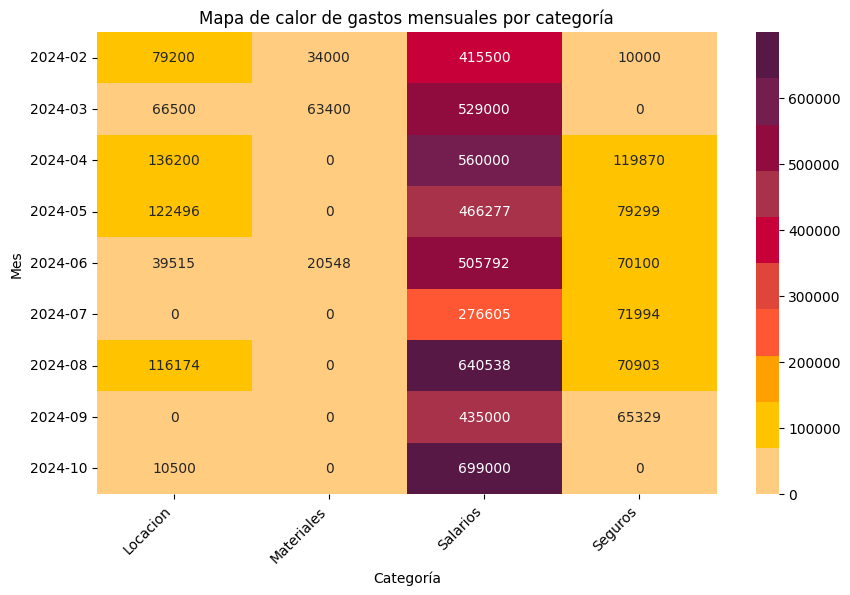

In [23]:
# Convertir la columna FECHA al primer día del mes
eg_totales_por_mes_categoria_v['FECHA'] = eg_totales_por_mes_categoria_v['FECHA']

# Calcular el total de gastos por mes y por categoría
gastos_mensuales = eg_totales_por_mes_categoria_v.groupby(['FECHA', 'DESCRIPCION'])[['EGRESOS-INFLACION']].sum().unstack(fill_value=0)

# Definir la paleta de colores personalizada
colores_personalizados = ['#FFCC80', '#FFC300', '#FF9F00', '#FF5733', '#E0453C', '#C70039', '#A83249', '#900C3F', '#731E4E', '#581845']

# Crear el heatmap con la paleta de colores personalizada
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    gastos_mensuales,
    annot=True,
    fmt=".0f",
    cmap=sns.color_palette(colores_personalizados, as_cmap=True)
)

# Configurar el título y etiquetas del gráfico
plt.title("Mapa de calor de gastos mensuales por categoría")
plt.xlabel("Categoría")
plt.ylabel("Mes")

nuevas_etiquetas = ['Locacion', 'Materiales', 'Salarios', 'Seguros']
ax.set_xticklabels(nuevas_etiquetas, rotation=45, ha="right") 

plt.show()

- con este heatmap vemos un pantallazo rapido de los gastos por mes y rubro:
    - la locacion se mantiene durante todo el anio en los gastos mas bajos, al igual que los seguros. 
    - A diferencia de Handball, los gastos de materiales de volley son casi nulos, con algun que otro gasto a inicio de anio y otro a mitad de anio
    - Se ve con gran diferenciacion que los mayores gastos en esta disciplina es en los salarios que en general van aumentando a medida que progresa el anio. 

    Veremos luego que es el mes de agosto el unico del anio que nos deja con egresos superiores a los ingresos. Con este Heatmap se puede ver que justo ese mes hubo un gran egreso en Salarios, un pequenio gasto (que por mas que sea pequenio suma) en locacion, y lo mismo en seguros. 

In [24]:
egresos_inflacion_v = eg_totales_por_mes_categoria_v.groupby(eg_totales_por_mes_categoria_v['FECHA'])[['EGRESOS-INFLACION']].sum().reset_index()

In [25]:
# Crear un DataFrame de ejemplo con las fechas y los egresos
data = {
    'FECHA': ['2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09', '2024-10'],
    'EGRESOS-INFLACION': [538700.00, 658900.00, 816070.00, 668072.20, 635954.41, 348598.96, 827615.60, 500329.20, 709500.00]
}

# Crear el DataFrame
egresos_inflacion_v = pd.DataFrame(data)

# Convertir la columna 'FECHA' a datetime, interpretando que es el primer día de cada mes
egresos_inflacion_v['FECHA'] = pd.to_datetime(egresos_inflacion_v['FECHA'], format='%Y-%m')

# Asignar 'FECHA' al eje X y 'EGRESOS-INFLACION' al eje Y
x = egresos_inflacion_v['FECHA']
y = egresos_inflacion_v['EGRESOS-INFLACION']

# Definir la traza para los egresos
trace1 = go.Bar(
    x=x,  # Fecha en el eje X
    y=y,  # Total de egresos en el eje Y
    name='Egresos por mes',
    marker={'color': '#900C3F'}
)

# Lista de trazas
data = [trace1]

# Layout del gráfico
layout = go.Layout(
    xaxis={
        'title': 'Fecha',
        'tickangle': 45,
        'tickmode': 'array',
        'tickformat': '%Y-%m',  # Formato de fecha para mostrar año y mes
    },
    yaxis={
        'title': 'Monto Total',
        'tickprefix': '$',
        'showgrid': True,
        'gridcolor': 'lightgrey'
    },
    barmode='group',
    title='Egresos Mensuales 2024',
    plot_bgcolor='white',
    paper_bgcolor='#f4f4f4',
    margin={'l': 50, 'r': 50, 't': 50, 'b': 100},
    hovermode='x unified'
)

# Crear la figura
fig = go.Figure(data=data, layout=layout)

# Mostrar el gráfico
fig.show()

# Exportar a HTML si deseas
pio.write_html(fig, 'Egresos_inflacion_v.html', auto_open=True)

In [26]:
pago_cuotas_categorias = ['Mini', 'Primera', 'Sub12', 'Sub14', 'Sub16', 'Sub18', 'Sub19', 'Recreativo']

mask = ing_totales_por_mes_categoria_v['DESCRIPCION'].isin(pago_cuotas_categorias)

ing_totales_por_mes_categoria_filtrado = ing_totales_por_mes_categoria_v[mask]

ing_totales_por_mes_categoria_v= ing_totales_por_mes_categoria_filtrado
ing_totales_por_mes_categoria_v['DESCRIPCION']=ing_totales_por_mes_categoria_v['DESCRIPCION'].replace('Su14', 'Sub14')

C:\Users\emita\AppData\Local\Temp\ipykernel_39516\1092376892.py:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



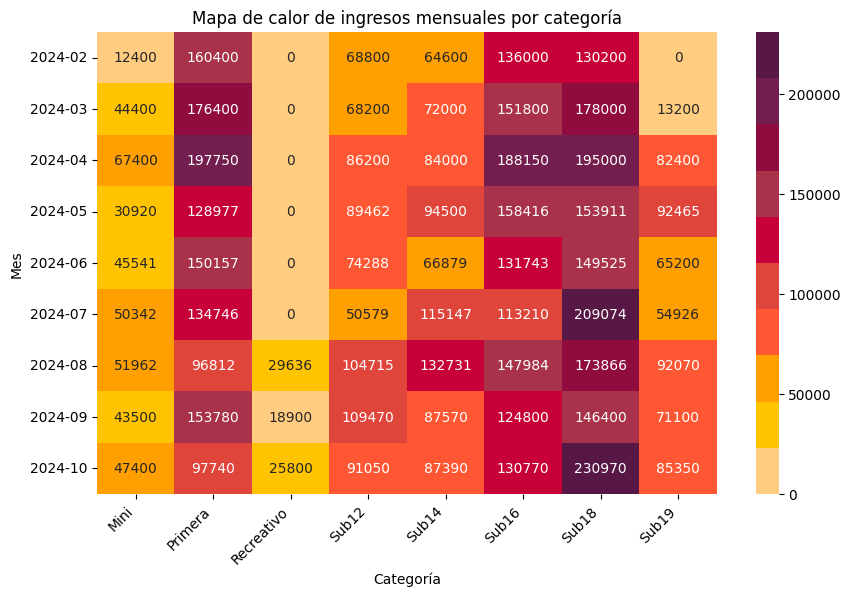

In [27]:
# Calcular el total de ingresos por mes y por categoría
ingresos_mensuales = ing_totales_por_mes_categoria_v.groupby(['FECHA', 'DESCRIPCION'])[['INGRESOS-INFLACION']].sum().unstack(fill_value=0)

# Definir la paleta de colores personalizada
colores_personalizados = ['#FFCC80', '#FFC300', '#FF9F00', '#FF5733', '#E0453C', '#C70039', '#A83249', '#900C3F', '#731E4E', '#581845']

# Crear el heatmap con la paleta de colores personalizada
plt.figure(figsize=(10, 6))
ax = sns.heatmap(
    ingresos_mensuales,
    annot=True,
    fmt=".0f",
    cmap=sns.color_palette(colores_personalizados, as_cmap=True)
)

# Obtener las categorías de 'DESCRIPCION' dinámicamente (de acuerdo a los datos)
nuevas_etiquetas = ingresos_mensuales.columns.levels[1]  # Obtener las categorías (niveles del multiíndice)

# Si el número de etiquetas es mayor que las categorías presentes, ajustarlas
if len(nuevas_etiquetas) > len(colores_personalizados):
    # Agregar colores si es necesario
    colores_personalizados.extend(['#123456', '#654321'] * (len(nuevas_etiquetas) - len(colores_personalizados)))

# Asignar las nuevas etiquetas al gráfico
ax.set_xticklabels(nuevas_etiquetas, rotation=45, ha="right")

# Configurar el título y etiquetas del gráfico
plt.title("Mapa de calor de ingresos mensuales por categoría")
plt.xlabel("Categoría")
plt.ylabel("Mes")

plt.show()

En este mapa de calor se muestra los ingresos por categoria, para poder observar rapidamente cuales son las que tienen mas ingresos (sea porque tienen una tasa de compromiso financiero mas alto, o porque tienen mas jugadores, eso se vera luego).
   - Se puede observar claramente que las categorias con mas ingresos son Sub16, Sub18 y Primera. 
   - La categoria de voley recreativo tiene ingresos casi nulos, pero hay que tener en cuenta que, al entrenar con la categoria mini, no tiene gastos de profesores. 
   - Sub12 y Sub14 tienen un poco mas de ingresos
   - Las que menos tienen son Mini (incluyendo aqui tambien a Recereativo)
   - Sub19 es la de menos ingresos, pero hay que tener en cuenta que comenzo el anio con 0 ingresos (0 jugadores)

### Socios

Vamos a ir un pasito mas alla, y evaluar la cantidad de socios por mes. Para ver si ese es el motivo por el cual hubieron menos ingresos. 

In [28]:
fig = px.bar(socios_vol_por_mes, x='MES', y='SOCIOS_VOL', 
             barmode='group',
             title='Comparativa Mensual de Socios',
             labels={'SOCIOS_VOL': 'Socios', 'FECHA': 'Fecha'})

fig.update_layout(
    xaxis_title="Fecha",
    yaxis_title="Total socios",
    plot_bgcolor='white',
    hovermode='x unified'
)

# Cambiar el color de las barras
fig.update_traces(marker_color='#C70039')  # Establecer el color de las barras

fig.show()
pio.write_html(fig, 'Socios_Por_mes_v.html', auto_open=True)

Como insights de esta grafica podemos ver como la cantidad de socios masomenos se mantuvo durante el anio. Comienza a crecer desde inicio de anio paulatinamente (con una pequenia baja en mayo), vuelve a bajar como hemos visto ya que es tendencia en Julio, y a partir de ahi crece hacia fin de anio. 

In [29]:
media_ingr_por_soc = round(ingresos_egresos_v['INGRESOS POR SOCIO'].mean(),2)
media_egre_por_soc = round(ingresos_egresos_v['EGRESOS POR SOCIO'].mean(),2)
media_saldo_por_soc = round(ingresos_egresos_v['SALDO POR SOCIO'].mean(),2)
print(media_ingr_por_soc)
print(media_egre_por_soc)
print(media_saldo_por_soc)

5840.12
4985.87
854.25


In [30]:
# Crear la figura con las tres series de tiempo en el mismo gráfico
fig = go.Figure()

# Ingresos
fig.add_trace(go.Scatter(
    x=ingresos_egresos_v['FECHA'], 
    y=ingresos_egresos_v['INGRESOS POR SOCIO'], 
    mode='lines+markers',
    line=dict(color='#900C3F', width=2), 
    marker=dict(size=8, color='#900C3F', symbol='circle'),
    name='Ingresos por socio'
))

# Egresos
fig.add_trace(go.Scatter(
    x=ingresos_egresos_v['FECHA'], 
    y=ingresos_egresos_v['EGRESOS POR SOCIO'], 
    mode='lines+markers',
    line=dict(color='#FF5733', width=2), 
    marker=dict(size=8, color='#FF5733', symbol='circle'),
    name='Egresos por socio'
))

# Saldo Acumulado
fig.add_trace(go.Scatter(
    x=ingresos_egresos_v['FECHA'], 
    y=ingresos_egresos_v['SALDO POR SOCIO'], 
    mode='lines+markers',
    line=dict(color='#FFC300', width=2),  
    marker=dict(size=8, color='#FFC300', symbol='circle'),
    name='Saldo por socio'
))

# Línea punteada en Y = 0 (ahora usando el rango extendido del eje X)
fig.add_shape(
    type="line",
    x0="FEB", x1="OCT",  # Ajustar manualmente para que cubra todo el rango
    y0=0, y1=0,
    line=dict(color="grey", width=0.5, dash="dash"),
)

# Configuración del diseño
fig.update_layout(
    title='Balance por socio: Ingresos, Egresos y Saldo',
    xaxis_title='Fecha',
    yaxis_title='Monto ($)',
    plot_bgcolor='white',
    hovermode='x unified',
    legend=dict(title='Categoría', orientation='h', x=0.5, xanchor='center', y=1.1)
)

# Configurar los ejes
fig.update_xaxes(showgrid=True, gridcolor='lightgrey', tickformat='%b %Y')
fig.update_yaxes(showgrid=True, gridcolor='lightgrey')

# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Balance_por_socio_v.html', auto_open=True)

Con esta grafica podemos concluir que la fluctuacion de socios no es directamente determinante de la cantidad de ingresos/egresos/saldo acumulado por socio, ya que vamos que en mayo y julio hubieron menos socios (encontrandose el mes de junio con mas socios que los meses mencionados), y sin embargo la grafica de dinero nos muestra que desde abril hasta junio inclusive fue en descenso, con un gran salto en julio donde los ingresos fueron considerablemente mayores que los egresos, y volviendo a bajar muy poquito y de forma paulatina hacia finde anio.

Esto nos deja el interrogante de: que es lo que hace que los ingresos de socios suban, pero los ingresos de dinero bajen, y visceversa, sin ninguna correlacion. 

Lo veremos luego con mas detalle cuando analicemos el porcentaje de compromiso financiero

In [31]:
ingresos_voley.groupby(ingresos_voley['FECHA'].dt.to_period('M'))[['MONTO']].sum().reset_index()

,FECHA,MONTO
0,2024-02,572400.0
1,2024-03,704000.0
2,2024-04,900900.0
3,2024-05,947300.0
4,2024-06,864650.0
5,2024-07,921200.0
6,2024-08,1049950.0
7,2024-09,1279200.0
8,2024-10,1327450.0


In [32]:
media_socios_por_mes = resultados_v.groupby('CATEGORIA')[['SOCIOS']].mean().reset_index()

In [33]:
# Datos para el gráfico
pie1_list = media_socios_por_mes.SOCIOS
labels = media_socios_por_mes.CATEGORIA

# Definir la paleta de colores
colors= ['#FFCC80', '#FFC300','#FF9F00', '#FF5733', '#E0453C', '#C70039', '#A83249', '#900C3F', '#731E4E', '#581845']

# Crear la figura de gráfico circular (Pie)
fig = go.Figure(
    data=[
        go.Pie(
            values=pie1_list,
            labels=labels,
            domain={"x": [0, 0]},
            name="Jugadores por categoría",
            hoverinfo="label+percent+name",
            hole=0.4,  # Hacer un gráfico de dona (agregar un hueco en el centro)
            marker={'colors': colors}  # Aplicar la paleta de colores
        )
    ],
    layout={
        "title": "Jugadores por categoría",
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "",
                "x": 0.0,
                "y": 1.0
            },
        ],
        # Ajustar el tamaño del gráfico
        "width": 500,  # Ajusta el ancho
        "height": 400,  # Ajusta la altura
        # Modificar márgenes para reducir el espacio blanco
        "margin": {"l": 50, "r": 50, "t": 50, "b": 30},
        # Ajustar la leyenda para que esté más cerca del gráfico
        "legend": {
            "x": 1,  # Posición X de la leyenda
            "y": 1.28,    # Posición Y de la leyenda
            "orientation": "v"  # Poner la leyenda en vertical
        }
    }
)
# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Media_juadores_v.html', auto_open=True)

In [34]:
socios_vol_por_mes['SOCIOS_VOL'].values

array([103, 121, 137, 124, 135, 113, 131, 138, 154])

In [35]:
ingresos_totales_por_mes = ingresos_voley.groupby(ingresos_voley['FECHA'].dt.to_period('M'))[['MONTO']].sum().reset_index()
ingresos_totales_por_mes['SOCIOS']=[103, 121, 137, 124, 135, 113, 131, 138, 154]
ingresos_y_socios=ingresos_totales_por_mes
ingresos_y_socios['MONTO']/ingresos_y_socios['SOCIOS']
ingresos_totales_por_mes

,FECHA,MONTO,SOCIOS
0,2024-02,572400.0,103
1,2024-03,704000.0,121
2,2024-04,900900.0,137
3,2024-05,947300.0,124
4,2024-06,864650.0,135
5,2024-07,921200.0,113
6,2024-08,1049950.0,131
7,2024-09,1279200.0,138
8,2024-10,1327450.0,154


In [36]:
solo_cuotas = ['Cuota', 'Cuota adeudada', 'Cuota medio mes']
cuotas = ingresos_voley[ingresos_voley['DESCRIPCION'].isin(solo_cuotas)]
cuotas=cuotas.reset_index(drop=True)

### Evaluamos ingresos por cat

In [37]:
pago_cuotas_categorias = ['Mini', 'Primera', 'Sub12', 'Sub14', 'Sub16', 'Sub18', 'Sub19', 'Recreativo']

mask = ing_totales_por_mes_categoria_v['DESCRIPCION'].isin(pago_cuotas_categorias)

ing_totales_por_mes_categoria_filtrado = ing_totales_por_mes_categoria_v[mask]

ing_totales_por_mes_categoria_v= ing_totales_por_mes_categoria_filtrado
ing_totales_por_mes_categoria_v['DESCRIPCION']=ing_totales_por_mes_categoria_v['DESCRIPCION'].replace('Su14', 'Sub14')

In [38]:
# Sumar los montos por categoría
ingresos_por_categoria = ingresos_voley.groupby('CATEGORIA')[['MONTO']].sum().reset_index()

# Datos para el gráfico
pie1_list = ingresos_por_categoria.MONTO
labels = ingresos_por_categoria.CATEGORIA

# Definir la paleta de colores
colors = ['#FFCC80', '#FFC300','#FF9F00', '#FF5733', '#E0453C', '#C70039', '#A83249', '#900C3F', '#731E4E', '#581845']

# Crear la figura de gráfico circular (Pie)
fig = go.Figure(
    data=[
        go.Pie(
            values=pie1_list,
            labels=labels,
            domain={"x": [0, 0]},
            name="Ingresos totales",
            hoverinfo="label+percent+name",
            hole=0.4,  # Hacer un gráfico de dona (agregar un hueco en el centro)
            marker={'colors': colors}  # Aplicar la paleta de colores
        )
    ],
    layout={
        "title": "Ingresos totales 2024 por categoría",
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Monto",
                "x": 0.0,
                "y": 1.0
            },
        ],
        # Ajustar el tamaño del gráfico
        "width": 700,  # Ajusta el ancho
        "height": 400,  # Ajusta la altura
        # Modificar márgenes para reducir el espacio blanco
        "margin": {"l": 50, "r": 50, "t": 50, "b": 30},
        # Ajustar la leyenda para que esté más cerca del gráfico
        "legend": {
            "x": 1.3,  # Posición X de la leyenda
            "y": 1.28,    # Posición Y de la leyenda
            "orientation": "v"  # Poner la leyenda en vertical
        }
    }
)
# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Ingresos2024_v.html', auto_open=True)

De este grafico podemos observar que los ingresos por categoria son en general bastante pares (no como en Handball, que hay gran disparidad en los ingresos, y la mayoria provienen de la primera -mayores-)
Y, como habiamos visto en el heatmap, el recreativo es casi nulo. 

- Se advierte que hay un porcentaje minimo (0.2 %) de concepto "Devolucion", que es bastante insignificante asi que no se sigue con el analisis de ese rubro. 
- Se concluye que los ingresos (practicamente en su totalidad) provienen de cuotas sociales. 

## Proporción de Egresos por Categorías:
- Desglosar los egresos (salarios, seguros, materiales, etc.) para identificar áreas de alto gasto.

#### Gasto promedio por jugador: seguro, salario, materiales, locacion 

In [39]:
# Sumar los montos por categoría
egresos_por_categoria = egresos_v.groupby('DESCRIPCION')[['MONTO']].sum().reset_index()


# Datos para el gráfico
pie1_list = egresos_por_categoria.MONTO
labels = egresos_por_categoria.DESCRIPCION

# Definir la paleta de colores
colors = [
    '#581845', 
    '#900C3F', 
    'C70039',  
    '#FF5733',  
    '#FFC300', 
]

# Crear la figura de gráfico circular (Pie)
fig = go.Figure(
    data=[
        go.Pie(
            values=pie1_list,
            labels=labels,
            domain={"x": [0, 0]},  # Ajustar la posición del gráfico en el canvas
            name="Egresos",
            hoverinfo="label+percent+name",
            hole=0.4,  # Hacer un gráfico de dona (agregar un hueco en el centro)
            marker={'colors': colors}  # Aplicar la paleta de colores
        )
    ],
    layout={
        "title": "Egresos",
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "Monto",
                "x": 0.0,
                "y": 1.0
            },
        ],
        # Ajustar el tamaño del gráfico
        "width": 500,  # Ajusta el ancho
        "height": 400,  # Ajusta la altura
        # Modificar márgenes para reducir el espacio blanco
        "margin": {"l": 50, "r": 50, "t": 50, "b": 50},
        # Ajustar la leyenda para que esté más cerca del gráfico
        "legend": {
            "x": 0.8,  # Posición X de la leyenda
            "y": 1.4,    # Posición Y de la leyenda
            "orientation": "v"  # Poner la leyenda en vertical
        }
    }
)

# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Egresos_por_cat_v.html', auto_open=True)

In [40]:
filtro3 = eg_totales_por_mes_categoria['DESCRIPCION'] == 'Seguro'
mask_pago_seguros = eg_totales_por_mes_categoria[filtro3]
mask_pago_seguros = mask_pago_seguros.groupby(mask_pago_seguros['FECHA'])[['EGRESOS-INFLACION']].sum().reset_index()
# Contamos desde abril hasta octubre, ya que en feb se pago solo 1 seguro, y en marzo nada. 
media_seg_por_mes_v = mask_pago_seguros['EGRESOS-INFLACION'][1:].mean()
media_soc_por_mes_v = socios_por_mes_tot['SOCIOS_VOL'].mean()
# Coste promedio de los 3 seguros por jugador.
media_seguro_h_jugador = round(media_seg_por_mes_v/media_soc_por_mes_v, 2)
media_seguro_h_jugador

np.float64(619.59)

In [41]:
filtro4 = eg_totales_por_mes_categoria['DESCRIPCION'] == 'Salarios'
mask_pago_salarios = eg_totales_por_mes_categoria[filtro4]
mask_pago_salarios = mask_pago_salarios.groupby(mask_pago_salarios['FECHA'])[['EGRESOS-INFLACION']].sum().reset_index()
mask_pago_salarios['GASTO_POR_SOCIO']= mask_pago_salarios['EGRESOS-INFLACION']/socios_por_mes_tot['SOCIOS_VOL']
media_salario_por_jugador = mask_pago_salarios['GASTO_POR_SOCIO'].mean()
media_salario_por_jugador

np.float64(3892.1054948039477)

In [42]:
filtro5= eg_totales_por_mes_categoria.loc[:, 'DESCRIPCION']== 'Materiales'
mask_pago_materiales=eg_totales_por_mes_categoria[filtro5]
mask_pago_materiales=mask_pago_materiales.groupby(mask_pago_materiales['FECHA'])[['EGRESOS-INFLACION']].sum().reset_index()
mask_pago_materiales['GASTO_POR_SOCIO']= mask_pago_materiales['EGRESOS-INFLACION']/socios_por_mes_tot['SOCIOS_VOL']
media_materiales_por_jugador = mask_pago_materiales['GASTO_POR_SOCIO'].mean()
media_materiales_por_jugador

np.float64(334.6826570444135)

In [43]:
filtro6= eg_totales_por_mes_categoria.loc[:, 'DESCRIPCION']== 'Gastos Locacion'
mask_locacion=eg_totales_por_mes_categoria[filtro6]
mask_locacion=mask_locacion.groupby(mask_locacion['FECHA'])[['EGRESOS-INFLACION']].sum().reset_index()
mask_locacion['GASTO_POR_SOCIO']= mask_locacion['EGRESOS-INFLACION']/socios_por_mes_tot['SOCIOS_VOL']
media_locacion_por_jugador = mask_locacion['GASTO_POR_SOCIO'].mean()
media_locacion_por_jugador

np.float64(671.6428793752091)

In [44]:
gasto_medio_por_jugador = round(media_seguro_h_jugador + media_salario_por_jugador + media_materiales_por_jugador + media_locacion_por_jugador,2)
gasto_medio_por_jugador

np.float64(5518.02)

In [45]:
# Esto seria si tomamos los valores sin inflacion, para poder compararlo con la cuota inicial de 7200
print("El costo medio por jugador por mes es de: ", gasto_medio_por_jugador)

El costo medio por jugador por mes es de:  5518.02


In [46]:
# Definir la cuota total
cuota = 6200

# Datos (suponiendo que ya tienes estos valores calculados)
resto = (cuota - gasto_medio_por_jugador)  # Resto de la cuota
seguro = media_seguro_h_jugador            # Seguro por jugador
salario = media_salario_por_jugador        # Salario por jugador
materiales = media_materiales_por_jugador  # Materiales por jugador
locacion = media_locacion_por_jugador      # Locación por jugador

# Crear una lista con los valores de cada parte del gráfico
pie1_list = [resto, seguro, salario, materiales, locacion]

# Etiquetas para las secciones del gráfico
labels = ['Resto', 'Seguro', 'Salario', 'Materiales', 'Locación']

colors = ['#581845', '#900C3F', '#C70039', '#FF5733', '#FFC300']

# Crear una paleta de colores personalizada con los colores definidos
colormap = ListedColormap(colors[:len(labels)])

# Crear la figura de gráfico circular (Pie)
fig = go.Figure(
    data=[go.Pie(
        values=pie1_list,  # Valores a graficar
        labels=labels,     # Etiquetas de cada sección
        domain={"x": [0, 0]},  # Ajustar la posición del gráfico en el canvas
        name="Cuota",  # Nombre general del gráfico
        hoverinfo="label+percent+name",  # Información al pasar el mouse
        hole=0.4,  # Hacer un gráfico de dona (agregar un hueco en el centro)
        marker={'colors': colors},  # Aplicar la paleta de colores
    )],
    layout={
        "title": "Costes de la cuota",  # Título del gráfico
        "annotations": [
            {
                "font": {"size": 20},
                "showarrow": False,
                "text": "",
                "x": 0.0,
                "y": 1.0
            },
        ],
        "width": 500,  # Ajustar el ancho del gráfico
        "height": 400,  # Ajustar la altura del gráfico
        "margin": {"l": 50, "r": 50, "t": 50, "b": 50},  # Márgenes del gráfico
        "legend": {
            "x": 0.8,  # Posición X de la leyenda
            "y": 1.4,  # Posición Y de la leyenda
            "orientation": "v"  # Poner la leyenda en vertical
        }
    }
)

# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Costos_cuota_v.html', auto_open=True)

Con este grafico poemos ver como es la distribucion de la cuota por jugador, viendo que el margen de resto es mucho mas grande que en Handball.

El gasto en salarios es masomenos similar que en Handball, pero siendo ls gastos de seguros, locacion y materiales bastante bajos es posible este margen de "ganancia" que en definitiva va al Saldo acumulado del club. 

# 3. Estacionalidad en la Rotación de Socios
- Análisis Mensual de Ingresos y Deserciones:
    - Graficar el número de nuevos socios e ingresos mensuales frente a la tasa de deserción.
- Identificación de Picos en Ingresos y Bajas:
    - Utilizar gráficos de líneas para destacar las tendencias a lo largo del año.

In [47]:
resultados_v['MES']=resultados_v['MES'].replace({'FEB': '02', 'MAR':'03', 'ABR':'04', 'MAY':'05', 'JUN':'06', 'JUL':'07', 'AGO':'08', 'SEPT':'09', 'OCT':'10'})
resultados_v

,CATEGORIA,MES,INGRESOS,EGRESOS,PERMANENCIAS,TOTAL ALUMNOS,% INGRESOS,% EGRESOS,% PERMANENCIAS,SOCIOS
0,Recreativo,02,0,0,0,0.0,0.00,0.00,0.00,0
1,Recreativo,03,0,0,0,0.0,0.00,0.00,0.00,0
2,Recreativo,04,0,0,0,0.0,0.00,0.00,0.00,0
3,Recreativo,05,0,0,0,0.0,0.00,0.00,0.00,0
4,Recreativo,06,0,0,0,0.0,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
67,Primera,06,5,0,30,35.0,14.29,0.00,100.00,35
68,Primera,07,0,8,27,19.0,0.00,42.11,57.89,19
69,Primera,08,9,8,19,20.0,45.00,40.00,60.00,20
70,Primera,09,2,2,26,26.0,7.69,7.69,92.31,26


In [48]:
resultados_v.groupby(['CATEGORIA', 'MES'])[['% PERMANENCIAS']].max().reset_index()
resultados_v['MES'].unique()

array(['02', '03', '04', '05', '06', '07', '08', '09', '10'], dtype=object)

In [49]:
totales = resultados_v.groupby(['MES', 'CATEGORIA'])[['INGRESOS', 'EGRESOS']].sum().reset_index()

In [50]:
porcentajes_perm_categoria = resultados_v.groupby('MES')[['% PERMANENCIAS']].mean().reset_index()
porcentajes_perm_categoria

,MES,% PERMANENCIAS
0,02,87.50000
1,03,83.28000
2,04,80.63750
3,05,74.98500
4,06,82.41250
5,07,86.80375
6,08,90.28250
7,09,82.35875
8,10,93.37875


In [51]:
# Crear una lista de las categorías disponibles en el DataFrame
categorias = resultados_v['CATEGORIA'].unique()

# Crear los subplots, uno por cada categoría
fig = make_subplots(
    rows=len(categorias), 
    cols=1, 
    shared_xaxes=False, 
    vertical_spacing=0.1,
    subplot_titles=[f'Categoría: {cat}' for cat in categorias]
)

# Colores para los diferentes tipos de datos
colores = {'INGRESOS': '#FF9F00', 'EGRESOS': '#C70039', 'PERMANENCIAS': '#FFCC80', 'TOTAL': '#581845'} 

# Definir etiquetas de meses
meses = ['FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEPT', 'OCT']

for i, cat in enumerate(categorias, start=1):
    # Filtrar datos por categoría actual
    datos_cat = resultados_v[resultados_v['CATEGORIA'] == cat]

    # Gráfico de barras apiladas para Ingresos, Egresos y Permanencias
    fig.add_trace(go.Bar(
        x=datos_cat['MES'], 
        y=datos_cat['INGRESOS'], 
        name='Ingresos',
        marker_color=colores['INGRESOS'],
        legendgroup="movimiento",  # Agrupar en la misma leyenda
        showlegend=(i == 1)  # Mostrar leyenda solo en el primer subplot
    ), row=i, col=1)

    fig.add_trace(go.Bar(
        x=datos_cat['MES'], 
        y=datos_cat['EGRESOS'], 
        name='Egresos',
        marker_color=colores['EGRESOS'],
        legendgroup="movimiento",  # Agrupar en la misma leyenda
        showlegend=(i == 1)  # Mostrar leyenda solo en el primer subplot
    ), row=i, col=1)

    fig.add_trace(go.Bar(
        x=datos_cat['MES'], 
        y=datos_cat['PERMANENCIAS'], 
        name='Permanencias',
        marker_color=colores['PERMANENCIAS'],
        legendgroup="movimiento",  # Agrupar en la misma leyenda
        showlegend=(i == 1)  # Mostrar leyenda solo en el primer subplot
    ), row=i, col=1)

    # Línea para el total de alumnos
    fig.add_trace(go.Scatter(
        x=datos_cat['MES'], 
        y=datos_cat['TOTAL ALUMNOS'], 
        mode='lines+markers', 
        name='Total Alumnos',
        line=dict(color=colores['TOTAL'], width=2),
        marker=dict(size=6, color=colores['TOTAL']),
        legendgroup="movimiento",  # Agrupar en la misma leyenda
        showlegend=(i == 1)  # Mostrar leyenda solo en el primer subplot
    ), row=i, col=1)
    
    # Actualizar el eje X de cada subplot con las etiquetas de los meses
    fig.update_xaxes(
        tickvals=datos_cat['MES'],  # Asegurarnos de que use los valores actuales de 'MES' en cada categoría
        ticktext=meses[:len(datos_cat)],  # Etiquetas de meses ajustadas según la longitud de datos
        row=i, col=1
    )

# Configuración de la disposición general
fig.update_layout(
    title="Evolución de Ingresos, Egresos, Permanencias y Total de Alumnos por Categoría",
    barmode='stack',
    yaxis_title='Número de Alumnos',
    height=300 * len(categorias),  # Ajusta la altura en función del número de categorías
    legend_title="Tipo de Movimiento",
    hovermode="x unified",
    plot_bgcolor="white"
)

# Personalización de los ejes Y
fig.update_yaxes(showgrid=True, gridcolor="lightgrey")

# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Ingresos_egresos_permanencias_totales_v.html', auto_open=True)

De este grafico podemos sacar algunas conclusiones:
- como habiamos visto, la categoria de Voley Recreativo no tiene ingresos hasta julio, y tiene una rotacion bastante importante en septiembre. Al tener ingresos en un 45% de los meses, no aporta significativamente a las arcas del club a nivel anual. 
- la permanencia de la categoria Mini es bastante importante, y generalmente cuando ay egresos, los ingresos los igualan o superan, por lo que la rotacion de jugadores en esta categoria es bastante positiva. 
- Lo mismo sucede con la Sub12, que el total de jugadores en rasgos generales de mantiene bastante durante el anio, y casi no hay egresos importantes que hagan que los numeros fluctuen. Incluso a fin de anio se ven bastantes nuevos ingresos, lo cual es positivo.
- La categoria Sub14 se mantiene bastante durante el anio, pero advertimos muchos egresos, en 2/3 de los meses vemos q hay egresos, siendo los nuevos ingresos bastante bajos. Principalmente esto se nota hacia el mes de octubre, en donde hay una gran cantidad de egresos, sin ingresos, por lo que el total baja. 
- El mismo patron se ve en el resto de las categorias: hay egresos (aunque no muchos) en todos los meses, aunque a diferencia de la Sub14, en estas se ve una alza hacia fin de anio, con egresos sobre todo en los meses de junio, julio y agosto. 


# 5. Comportamiento de Pago por Segmento
- Análisis de Cumplimiento de Pagos:
    - Graficar la tasa de pagos completos y saldos pendientes por categoría.
- Comparativa de Compromiso Financiero:
    - Comparar el compromiso financiero de los diferentes grupos demográficos.

In [52]:
deuda_por_cat_v = pagos_voley_limpio.groupby('CATEGORIA')[['DEUDA']].sum().reset_index()

In [53]:
# Crear el gráfico de barras
fig = px.bar(deuda_por_cat_v, 
             x='CATEGORIA', 
             y='DEUDA', 
             barmode='group',
             title='Deudas por categoria',
             labels={'CATEGORIA': 'Categoria', 'DEUDA': 'Deuda'})

# Actualizar el diseño del gráfico
fig.update_layout(
    xaxis_title="Categoria",
    yaxis_title="Deuda",
    plot_bgcolor='white',
    hovermode='x unified'
)

# Cambiar el color de las barras
fig.update_traces(marker_color='#C70039')  # Establecer el color de las barras

# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Deudas_por_cat_v.html', auto_open=True)

Al igual que en Handball, la categoria con mas deuda es la de Primera (Mayores), y aqui tambien vemos a la Sub12 con una deuda medianamente significativa. Esto se podra analizar mejor con el porcentaje de compromiso financiero a la hora del pago de la cuota

In [55]:
pagos_vol = pagos_voley_limpio.copy()

In [56]:
pagos_vol['ABR'].unique()

array(['No inscripto', 'X', 'Baja', 8000, 'Beca'], dtype=object)

In [57]:
filter = pagos_vol.loc[:, 'CATEGORIA'] == 'Recreativo'
pagos_vol[filter]

,CATEGORIA,APELLIDO,NOMBRE,SEGURO,FEB,MAR,ABR,MAY,JUN,JUL,AGO,SEPT,OCT,DEUDA
0,Recreativo,Castro,Macarena,Si,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,X,X,12500,12500.0
1,Recreativo,Gast Passamonti,Luana,Si,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,X,X,Baja,Baja,0.0
2,Recreativo,Gutierrez,Sol,No,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,12500,X,12500.0
3,Recreativo,Maisonave,Sofia,Si,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,X,Baja,Baja,0.0
4,Recreativo,Miranda,Sofia Abril,Si,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,X,X,X,X,0.0
5,Recreativo,Peralta,Milagros,Si,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,12500,X,12500.0
6,Recreativo,Roman,Victoria,Si,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,X,X,12500,X,12500.0
7,Recreativo,Sosa Nain,Agustina,Si,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,X,X,X,0.0
8,Recreativo,Tortorella,Kamila,Si,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,X,12500,12500,25000.0
9,Recreativo,Vallejos,Sol,Si,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,No inscripto,X,X,12500,12500.0


In [58]:
payment_mapping = {
    'X': 1,
    'No inscripto': np.nan,  
    'Beca': np.nan,          
    'No entreno': np.nan,     
    'Baja': np.nan,           
    'Lesion': np.nan,        
    12500: 0,
    9500: 0.76,
    7500: 0.6,
    8000: 0.64,
    4500: 0.35,
    6000: 0.48,
    6250: 0.5
}

# Aplicar el mapeo de pagos a cada columna de mes
for month in ['FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEPT', 'OCT']:
    pagos_vol[month] = pagos_vol[month].replace(payment_mapping).astype(float)

# Calcular la tasa de pagos completos
pagos_vol['TASA_PAGOS'] = pagos_vol[['FEB', 'MAR', 'ABR', 'MAY', 'JUN', 'JUL', 'AGO', 'SEPT', 'OCT']].mean(axis=1)

# Agrupar por categoría
tasa_por_categoria = pagos_vol.groupby('CATEGORIA')[['TASA_PAGOS']].mean().reset_index()

# Colores personalizados
colors = ['#FFF700', '#FFC300', '#FF5733', '#C70039', '#900C3F', '#581845', '#FF6F61', '#FF8C42', '#FFB84D', '#FF3D00']

# Crear la figura
fig = go.Figure()

# Agregar las barras para cada categoría
for i, cat in enumerate(tasa_por_categoria['CATEGORIA']):
    fig.add_trace(go.Bar(
        x=[cat],
        y=[tasa_por_categoria.loc[i, 'TASA_PAGOS']],
        name=cat,
        marker_color=colors[i % len(colors)]  # Usa el color correspondiente
    ))

# Líneas de referencia para el compromiso financiero (se agregan como trazas invisibles)
fig.add_trace(go.Scatter(
    x=[tasa_por_categoria['CATEGORIA'].iloc[0], tasa_por_categoria['CATEGORIA'].iloc[-1]],  # Desde la primera hasta la última categoría
    y=[0.85, 0.85],  # Mismo valor en Y para toda la línea
    mode='lines',
    line=dict(color='red', dash='dash', width=1),
    name="85% Compromiso Financiero"  # Nombre que aparecerá en la leyenda
))

fig.add_trace(go.Scatter(
    x=[tasa_por_categoria['CATEGORIA'].iloc[0], tasa_por_categoria['CATEGORIA'].iloc[-1]],  # Desde la primera hasta la última categoría
    y=[1, 1],  # Mismo valor en Y para toda la línea
    mode='lines',
    line=dict(color='black', dash='dash', width=1),
    name="100% Compromiso Financiero"  # Nombre que aparecerá en la leyenda
))

# Personalizar el diseño del gráfico
fig.update_layout(
    title="Tasa de Pagos Completos por Categoría",
    xaxis_title="Categoría",
    yaxis_title="Tasa de Pagos Completos",
    yaxis=dict(range=[0, 1.05]),  # Limitar el eje Y entre 0 y 1.05
    showlegend=True,  # Mostrar la leyenda
    plot_bgcolor="white",
    legend=dict(
        x=1,  # Colocar la leyenda en la parte derecha
        y=1,  # Colocar la leyenda en la parte superior
        traceorder='normal',
        font=dict(size=12),
        title="Compromiso Financiero",
        bgcolor="white",
        bordercolor="black",
        borderwidth=1
    )
)

# Mostrar el gráfico
fig.show()
pio.write_html(fig, 'Tasa_pagos_por_cat_V.html', auto_open=True)

C:\Users\emita\AppData\Local\Temp\ipykernel_39516\97323789.py:19: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\emita\AppData\Local\Temp\ipykernel_39516\97323789.py:19: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

C:\Users\emita\AppData\Local\Temp\ipykernel_39516\97323789.py:19: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.

In [59]:
porcentaje_pagos = pagos_vol.groupby('CATEGORIA')[['TASA_PAGOS']].mean().reset_index()
p_pagos = round(porcentaje_pagos.sort_values(by='TASA_PAGOS', ascending=True).reset_index(drop=True), 2)
p_pagos

,CATEGORIA,TASA_PAGOS
0,Recreativo,0.74
1,Sub19,0.86
2,Sub12,0.92
3,Sub16,0.92
4,Sub18,0.93
5,Primera,0.94
6,Sub14,0.98
7,Mini,1.00
